In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pypsa
import matplotlib.patches as mpatches

c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\networkclustering.py:16: UserWarning: The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 
  warnings.warn(


In [2]:
red1 = '#891D2D'
red2 = '#BA3B31'
orange = '#F58221'
yellow = '#FCAF19'
brown = '#440A15'
purple1 = '#3B1053'
purple2 = '#76518E'
purple3 = '#B69DC7'
teal1 = '#032838'
teal2 = '#154655'
teal3 = '#527D77'
teal4 = '#8DB5AF'
green1 = '#294839'
green2 = '#6E966E'
green3 = '#A3BDA3'
beige1 = '#927F48'
beige2 = '#A89677'
beige3 = '#D2CDAD'

from matplotlib.colors import ListedColormap




plt.rcParams['font.size'] = 18
zones = ['Northern', 'Oriental', 'Central', 'Southern']
zone_colors=[teal1,teal4,teal2,teal3]

# Define your custom colormap
cmap_zones = ListedColormap(zone_colors)

In [4]:
solved_network = "c:/Users/marih/test4/pypsa-earth/saved_networks/4_nodes_validation_network/results/elec_s_4_ec_lcopt_Co2L-1H.nc"
print(solved_network)
n_solve = pypsa.Network(solved_network)
n = n_solve
n.buses[:4]

c:/Users/marih/test4/pypsa-earth/saved_networks/4_nodes_validation_network/results/elec_s_4_ec_lcopt_Co2L-1H.nc


c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, pleas

,v_nom,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
BO0 0,220.0,BO,-67.382533,-17.429067,Slack,BO0 0 OCGT,AC,,,1.0,0.0,inf,
BO0 1,220.0,BO,-65.704740,-17.393010,PQ,,AC,,,1.0,0.0,inf,
BO0 2,220.0,BO,-65.790486,-19.342000,PQ,,AC,,,1.0,0.0,inf,
BO0 3,220.0,BO,-63.321900,-17.567400,PQ,,AC,,,1.0,0.0,inf,


In [5]:
cap_factors = n.generators_t.p_max_pu.mean()
cap_factors

Generator
BO0 0 onwind    0.053656
BO0 0 solar     0.174346
BO0 1 onwind    0.051714
BO0 1 solar     0.159982
BO0 2 onwind    0.107579
BO0 2 solar     0.201055
BO0 3 onwind    0.151543
BO0 3 solar     0.140165
dtype: float64

c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, pleas

Generator
BO0 0 onwind    0.054
BO0 1 onwind    0.052
BO0 2 onwind    0.108
BO0 3 onwind    0.152
dtype: float64


C:\Users\marih\AppData\Local\Temp\ipykernel_21656\96522315.py:27: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  r.plot(ax=ax1, column="factor",color=[green3,green1,yellow,green1],alpha=1, vmin=0, vmax=1) # four zones colored #  color=zone_colors


Text(0.5, 1.0, 'Average capacity factor wind')

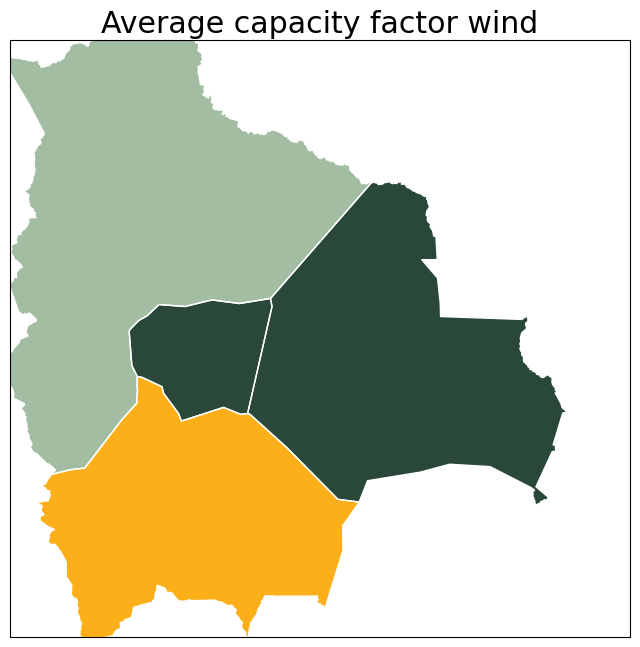

In [6]:
import cartopy.crs as ccrs
import geopandas as gpd
plot_capfacs_onwind = (
    "onwind"  # colors in the back represent capacity factors for this technology
)
home = 'C:/Users/marih/test4/pypsa-earth/'

fig, ax1 = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()},figsize = (8,8))
 

n = pypsa.Network(home + f"saved_networks/4_nodes_validation_network/networks/elec_s_4.nc")
r = gpd.read_file(home + 
    f"resources/bus_regions/regions_onshore_elec_s_4.geojson"
).set_index("name")

factor_wind = n.generators_t.p_max_pu.filter(like=plot_capfacs_onwind).mean()
print(factor_wind.round(3))
factor_wind.index = [idx.split(f" {plot_capfacs_onwind}")[0] for idx in factor_wind.index]
r["factor"] = factor_wind

# 4 clusters network boundaries
ax1.set_xlim(left=min(n.buses.x)-2.0, right=max(n.buses.x)+7.2)
ax1.set_ylim(bottom=min(n.buses.y)-3.5, top=max(n.buses.y)+6.8)

r.boundary.plot(ax=ax1, color='white', linewidth=1, alpha=1) # four zones

r.plot(ax=ax1, column="factor",color=[green3,green1,yellow,green1],alpha=1, vmin=0, vmax=1) # four zones colored #  color=zone_colors

import matplotlib.patches as mpatches

northern = mpatches.Patch(color=teal1, label ='Northern')
central = mpatches.Patch(color=teal2, label ='Central')
southern = mpatches.Patch(color=teal3, label ='Southern')
oriental = mpatches.Patch(color=teal4, label ='Oriental')

handles=[northern,central,southern,oriental]
ax1.set_title('Average capacity factor wind')


Generator
BO0 0 solar    0.17
BO0 1 solar    0.16
BO0 2 solar    0.20
BO0 3 solar    0.14
dtype: float64


C:\Users\marih\AppData\Local\Temp\ipykernel_21656\3925908638.py:14: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  r.plot(ax=ax1, column="factor",color=[orange,yellow,yellow,orange],alpha=1, vmin=0, vmax=1) # four zones colored #  color=zone_colors


Text(0.5, 1.0, 'Average capacity factor solar PV')

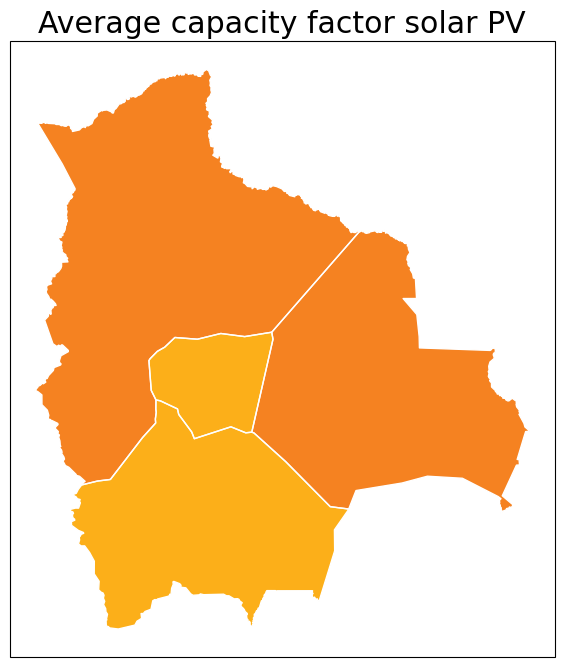

In [7]:
plot_capfacs_solar = (
    "solar"  # colors in the back represent capacity factors for this technology
)

fig, ax1 = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()},figsize = (8,8))

factor_solar = n.generators_t.p_max_pu.filter(like=plot_capfacs_solar).mean()
print(factor_solar.round(2))
factor_solar.index = [idx.split(f" {plot_capfacs_solar}")[0] for idx in factor_solar.index]
r["factor"] = factor_solar 

r.boundary.plot(ax=ax1, color='white', linewidth=1, alpha=1) # four zones

r.plot(ax=ax1, column="factor",color=[orange,yellow,yellow,orange],alpha=1, vmin=0, vmax=1) # four zones colored #  color=zone_colors

northern = mpatches.Patch(color=teal1, label ='Northern')
central = mpatches.Patch(color=teal2, label ='Central')
southern = mpatches.Patch(color=teal3, label ='Southern')
oriental = mpatches.Patch(color=teal4, label ='Oriental')

handles=[northern,central,southern,oriental]
ax1.set_title('Average capacity factor solar PV')

In [8]:
std_onwind = n.generators_t.p_max_pu.filter(like=plot_capfacs_onwind).std().round(2)
std_solar = n.generators_t.p_max_pu.filter(like=plot_capfacs_solar).std().round(2)
std_onwind.index = [idx.split(f" {plot_capfacs_onwind}")[0] for idx in std_onwind.index]
std_solar.index = [idx.split(f" {plot_capfacs_solar}")[0] for idx in std_solar.index]

std_rnw = pd.DataFrame([std_onwind, std_solar], index = ['Standard deviation wind', 'Standard deviation solar']).T

mean_cf = pd.DataFrame([factor_wind, factor_solar], index = ['Average cf wind', 'Average cf solar']).T

pd.concat([mean_cf, std_rnw], axis = 1).round(2)


,Average cf wind,Average cf solar,Standard deviation wind,Standard deviation solar
BO0 0,0.05,0.17,0.06,0.22
BO0 1,0.05,0.16,0.09,0.21
BO0 2,0.11,0.20,0.12,0.26
BO0 3,0.15,0.14,0.17,0.19


In [9]:
n.generators.p_nom.filter(like="onwind")

Generator
BO0 0 onwind      0.00
BO0 1 onwind     26.54
BO0 2 onwind      0.00
BO0 3 onwind    100.80
Name: p_nom, dtype: float64